In [43]:
import cv2 as cv
import numpy as np
import imutils
from matplotlib import pyplot as plt

In [44]:
!ls figs

cinza.jpg
cinzaout.jpg
HubIA_Poligonos_data_cultura.csv
imgTeste.jpg
JP.jpeg
JP2.jpg
logo.png
messi5.jpg
tetris.png


## Mostrando uma imagem
![title](figs/imgTeste.jpg)

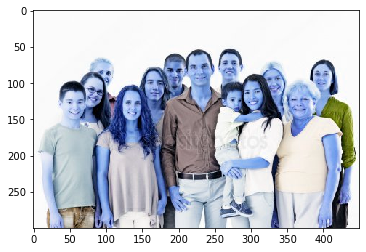

In [45]:
img = cv.imread('figs/imgTeste.jpg')

plt.imshow(img)

* As cores da nossa imagem estão erradas!

* O OpenCV representa imagens RGB como matrizes NumPy multidimensionais mas em ordem inversa

* imagens são representadas em ordem BGR em vez de RGB!

* Para mostrar corretamente é necessário converter de BGR para RGB:

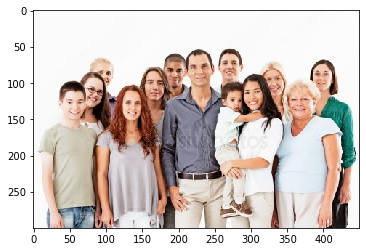

In [46]:
img = cv.imread('figs/imgTeste.jpg')

plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## obtendo tamanho da imagem (usando recursos do numpy)
* Nesse exemplo, Altura x Largura x Quantidade de Canais

In [47]:
img.shape

(300, 450, 3)

## Obtendo valores de canais de um único pixel

In [48]:
(B, G, R) = img[100, 50]
print("R={}, G={}, B={}".format(R, G, B))

R=37, G=24, B=18


## Alterando valor de um pixel

In [49]:
px = img[50,50]
print( px )

blue = img[100,100,0]
print( blue )

img[50,50] = [255,255,255]
print( img[50,50] )

[251 251 251]
188
[255 255 255]


## Alterando valor de um bloco de pixels

In [50]:
img[50:70,50:70] = [255,0,0]

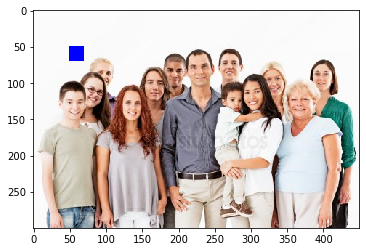

In [51]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Abrindo uma imagem em tons de cinza

(480, 1120, 3)


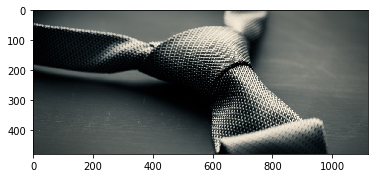

In [37]:
img = cv.imread('figs/cinza.jpg')
print(img.shape)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

In [38]:
img = cv.imread("figs/cinza.jpg", -1) 
cv.imwrite("figs/cinzaout.jpg", img) 

True

(480, 1120)


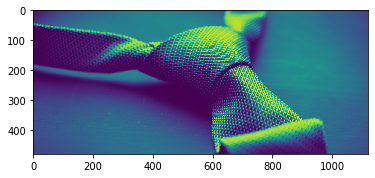

In [39]:
img = cv.imread('figs/cinzaout.jpg',0)
print(img.shape)
plt.imshow(img)

## Crop e Slicing de imagem
* O primeiro parâmetro corta horizontalmente e segundo verticalmente

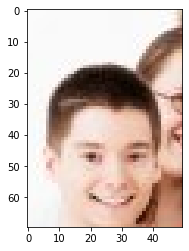

In [52]:
roi = img[80:150, 30:80]
plt.imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB))

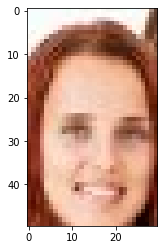

In [53]:
roi = img[100:150, 120:150]
plt.imshow(cv.cvtColor(roi, cv.COLOR_BGR2RGB))

In [54]:
#import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Incluindo elemento na imagem

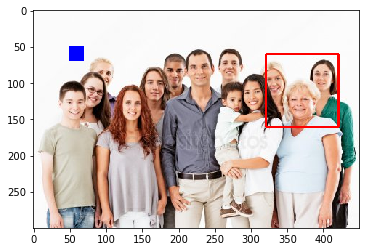

In [55]:
output = img.copy()
cv.rectangle(output, (320, 60), (420, 160), (0, 0, 255), 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

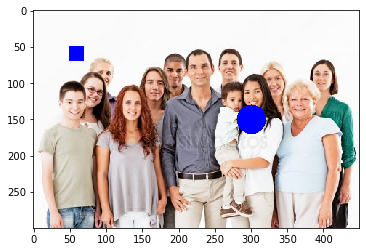

In [56]:
output = img.copy()
cv.circle(output, (300, 150), 20, (255, 0, 0), -1)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

In [57]:
## Incluindo texto na imagem

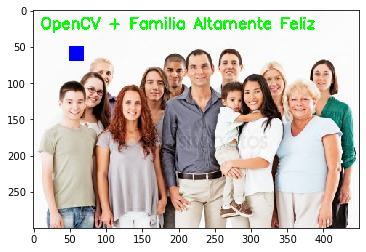

In [58]:
output = img.copy()
cv.putText(output, "OpenCV + Familia Altamente Feliz", (10, 25), 
           cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))

## Representação piramide
* Diminuindo a quantidade de pixels por região da imagem

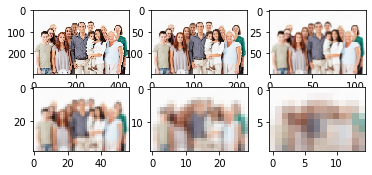

In [59]:
img = cv.imread('figs/imgTeste.jpg')

layer = img.copy() 

for i in range(6): 
    plt.subplot(3, 3, i + 1) 
  
    plt.imshow(cv.cvtColor(layer, cv.COLOR_BGR2RGB))
    layer = cv.pyrDown(layer) 

# Alterando tamanho da imagem
* Ignorando aspect ratio

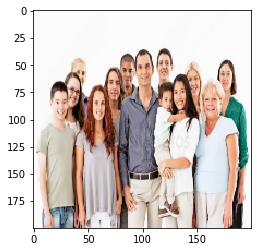

In [60]:
resized = cv.resize(img, (200, 200))
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))

# Resize 
* considerando aspect ratio


Original Dimensions :  (300, 450, 3)
novas dimensões :  (180, 270, 3)


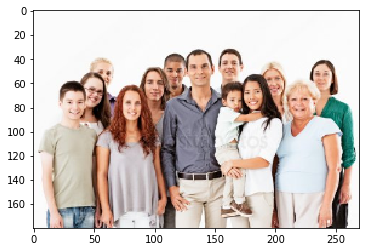

In [62]:
import cv2
img = cv.imread('figs/imgTeste.jpg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # porcentagem da imagem original
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv.resize(img,dim)
 
print('novas dimensões : ',resized.shape)
plt.imshow(cv.cvtColor(resized, cv.COLOR_BGR2RGB))

## Alterando posição da imagem
* Função warpAffine

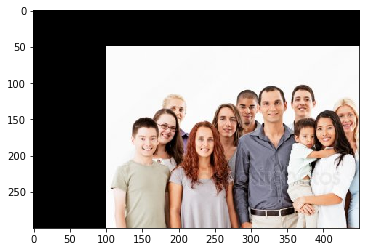

In [63]:
img = cv.imread('figs/imgTeste.jpg')
rows,cols,channels = img.shape

M = np.float32([[1,0,100],[0,1,50]])

dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

## Rotacionando imagem
* Rotação simples cortandoa  imagem

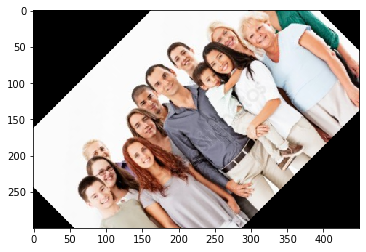

In [64]:
img = cv.imread('figs/imgTeste.jpg')

rows,cols,channels = img.shape


M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)

dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB))

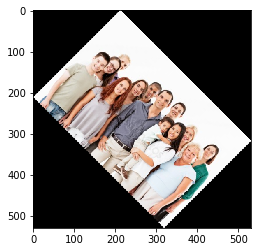

In [70]:
img = cv.imread('figs/imgTeste.jpg')

rotated = imutils.rotate_bound(img, 45)
#rotated = rotate_bound2(img, 35)

#rows,cols,channels = img.shape
#M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),45,1)
#dst = cv.warpAffine(img,M,(cols,rows))

plt.imshow(cv.cvtColor(rotated, cv.COLOR_BGR2RGB))


## Tetris

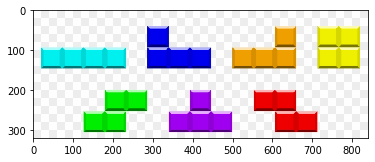

In [71]:
img = cv.imread('figs/tetris.png')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))

## Modificando para escala de cinza

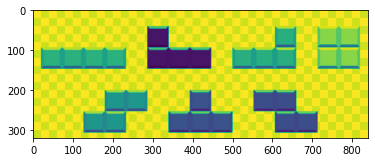

In [91]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray)

## Algoritmo para detecção de borda

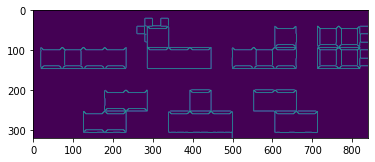

In [92]:
edged = cv2.Canny(gray, 30, 150)
plt.imshow(edged)

## Thresholding
* Ajuda a remover regiões ou contornos mais claros ou escuros
* Nesse exemplo criou um limiar para o valor de pixel 225
    * valores maiores que 225 são alterados para 255
    * valores menores que 225 são alterados para 0

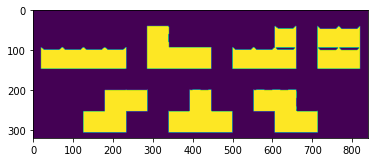

In [93]:
thresh = cv.threshold(gray, 225, 255, cv.THRESH_BINARY_INV)[1]
plt.imshow(thresh)

In [ ]:
# Detectando e desenhando cotornos

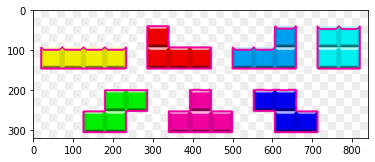

In [94]:
# find contours (i.e., outlines) of the foreground objects in the
# thresholded image
cnts = cv.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = img.copy()


for c in cnts:
    # draw each contour on the output image with a 3px thick purple
    # outline, then display the output contours one at a time
    cv.drawContours(output, [c], -1, (240, 0, 159), 3)
    plt.imshow(output)

In [98]:
# draw the total number of contours found in purple
print(len(cnts))
#text = "{} objetos".format(len(cnts))
#cv.putText(output, text, (10, 25),  cv2.FONT_HERSHEY_SIMPLEX, 0.7, (240, 0, 159), 2)
#plt.imshow(output)

7


## Erosão

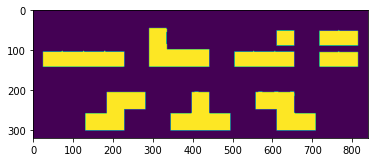

In [99]:
mask = thresh.copy()
mask = cv.erode(mask, None, iterations=5)
plt.imshow(mask)

## Dilatação

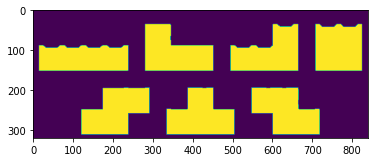

In [100]:
mask = thresh.copy()
mask = cv.dilate(mask, None, iterations=5)
plt.imshow(mask)

## bitwise

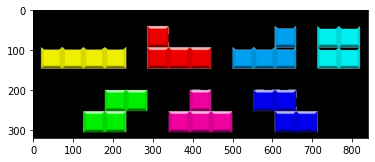

In [103]:
mask = thresh.copy()
output = cv.bitwise_and(img, img, mask=mask)
plt.imshow(output)